#PRACTICAL QUESTIONS

In [ ]:
# Q1: Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
print("Bagging Classifier Accuracy:", bag_clf.score(X_test, y_test))


Bagging Classifier Accuracy: 0.9473684210526315


In [ ]:
# Q2: Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE: 3237.526541353384


In [ ]:
# Q3: Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.datasets import load_diabetes # Import load_diabetes to get feature names

# Assuming rf was trained on the diabetes dataset in the previous cell
# If you intended to train on breast cancer, you would need to re-train rf here
# rf = RandomForestClassifier(random_state=42)
# X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(load_breast_cancer().data, load_breast_cancer().target, test_size=0.3, random_state=42)
# rf.fit(X_train_bc, y_train_bc)


importances = pd.Series(rf.feature_importances_, index=load_diabetes().feature_names) # Use diabetes feature names
print("Feature Importances:\n", importances.sort_values(ascending=False))

Feature Importances:
 bmi    0.123538
s5     0.121567
bp     0.115831
s2     0.114886
s6     0.113717
s1     0.112643
s3     0.108779
age    0.105341
s4     0.056704
sex    0.026995
dtype: float64


In [ ]:
# Q4: Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", dt_mse)


Random Forest MSE: 2859.641982706767
Decision Tree MSE: 5697.789473684211


In [ ]:
# Q5: Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_oob = RandomForestClassifier(oob_score=True, n_estimators=100, bootstrap=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.006472491909385114


In [15]:
# Q6: Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Need to load data again if this cell is run independently
# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Changed base_estimator to estimator
bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
print("Bagging Classifier (SVM) Accuracy:", bag_svm.score(X_test, y_test))

Bagging Classifier (SVM) Accuracy: 0.9473684210526315


In [16]:
# Q7: Train a Random Forest Classifier with different numbers of trees and compare accuracy

for n in [10, 50, 100, 200]:
    rf_n = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_n.fit(X_train, y_train)
    acc = rf_n.score(X_test, y_test)
    print(f"Random Forest with {n} trees - Accuracy: {acc}")


Random Forest with 10 trees - Accuracy: 0.9649122807017544
Random Forest with 50 trees - Accuracy: 0.9707602339181286
Random Forest with 100 trees - Accuracy: 0.9707602339181286
Random Forest with 200 trees - Accuracy: 0.9707602339181286


In [20]:
# Q8: Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier # Explicitly import BaggingClassifier here if this cell is run independently
from sklearn.model_selection import train_test_split # Explicitly import if this cell is run independently
from sklearn.datasets import load_breast_cancer # Explicitly import if this cell is run independently

# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Changed base_estimator to estimator to match current sklearn API
bag_log = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bag_log.fit(X_train, y_train)
y_proba = bag_log.predict_proba(X_test)[:, 1]
print("Bagging Classifier (LogReg) AUC:", roc_auc_score(y_test, y_proba))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier (LogReg) AUC: 0.9977954144620812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
# Q9: Train a Random Forest Regressor and analyze feature importance scores

from sklearn.datasets import load_breast_cancer # Import load_breast_cancer to get feature names

# Assuming X_train, y_train are from the Breast Cancer dataset based on previous cells
# If not, you would need to load and split the data here as well
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Re-initialize and fit rf_reg with the current data if needed,
# or if you want to ensure it's trained on breast cancer for this step
# from sklearn.ensemble import RandomForestRegressor
# rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Use feature names from the Breast Cancer dataset
importances = pd.Series(rf_reg.feature_importances_, index=load_breast_cancer().feature_names)
print("Random Forest Regressor Feature Importances:\n", importances.sort_values(ascending=False))

Random Forest Regressor Feature Importances:
 mean concave points        0.387641
worst concave points       0.229101
worst perimeter            0.121435
worst area                 0.058610
worst radius               0.041910
worst texture              0.029700
worst concavity            0.021604
mean texture               0.018146
area error                 0.015524
radius error               0.009379
worst smoothness           0.008784
fractal dimension error    0.005621
worst symmetry             0.004915
mean area                  0.004618
concavity error            0.004068
mean perimeter             0.004037
smoothness error           0.004007
worst fractal dimension    0.003675
symmetry error             0.003513
mean fractal dimension     0.003355
mean smoothness            0.002928
mean concavity             0.002915
texture error              0.002507
mean symmetry              0.002032
concave points error       0.001994
perimeter error            0.001989
worst compactness 

In [24]:
# Q10: Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Import both classifiers
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.datasets import load_breast_cancer # Import the dataset


# Ensure data is loaded and split if this cell is run independently
# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Changed base_estimator to estimator
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

bag_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Bagging Accuracy:", bag_model.score(X_test, y_test))
print("Random Forest Accuracy:", rf_model.score(X_test, y_test))

Bagging Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9707602339181286


In [25]:
# Q11: Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
print("Best Params:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)



Best Params: {'max_depth': None, 'n_estimators': 50}
Best Accuracy: 0.9622920938710413


In [28]:
# Q12: Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, you would need to load and split the data here as well

for n in [5, 10, 20, 50]:
    # Changed base_estimator to estimator to match current sklearn API
    bag_reg_n = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_reg_n.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag_reg_n.predict(X_test))
    print(f"Bagging Regressor with {n} estimators - MSE: {mse}")

Bagging Regressor with 5 estimators - MSE: 0.04421052631578948
Bagging Regressor with 10 estimators - MSE: 0.03923976608187135
Bagging Regressor with 20 estimators - MSE: 0.03698830409356725
Bagging Regressor with 50 estimators - MSE: 0.03394152046783626


In [29]:
# Q13: Train a Random Forest Classifier and analyze misclassified samples

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
misclassified = X_test[y_test != y_pred]
print("Number of Misclassified Samples:", len(misclassified))


Number of Misclassified Samples: 5


In [31]:
# Q14: Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier # Ensure DecisionTreeClassifier is imported
from sklearn.ensemble import BaggingClassifier # Ensure BaggingClassifier is imported
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported
from sklearn.datasets import load_breast_cancer # Ensure data is loaded if not already available

# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Changed base_estimator to estimator
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)

print("Single Decision Tree Accuracy:", tree_clf.score(X_test, y_test))
print("Bagging Classifier Accuracy:", bag_clf.score(X_test, y_test))

Single Decision Tree Accuracy: 0.9415204678362573
Bagging Classifier Accuracy: 0.9473684210526315


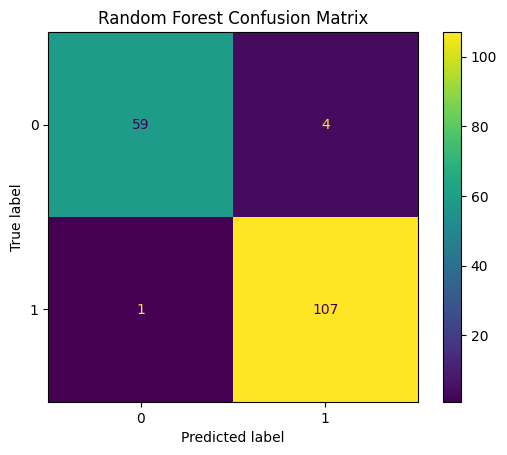

In [33]:
# Q15: Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib.pyplot

rf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [35]:
# Q16: Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Ensure data is loaded and split if this cell is run independently
# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=1000))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_clf.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack_clf.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9707602339181286


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Q17: Train a Random Forest Classifier and print the top 5 most important features

rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=load_breast_cancer().feature_names)
print("Top 5 Features:\n", importances.sort_values(ascending=False).head(5))


Top 5 Features:
 mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


In [37]:
# Q18: Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.9626168224299065
Recall: 0.9537037037037037
F1 Score: 0.958139534883721


In [46]:
# Q19: Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

for depth in [None, 3, 5, 10]:
    rf_depth = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_depth.fit(X_train, y_train)
    acc = rf_depth.score(X_test, y_test)
    print(f"max_depth={depth} -> Accuracy: {acc}")


max_depth=None -> Accuracy: 0.9707602339181286
max_depth=3 -> Accuracy: 0.9707602339181286
max_depth=5 -> Accuracy: 0.9649122807017544
max_depth=10 -> Accuracy: 0.9707602339181286


In [39]:
# Q20: Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # Import BaggingRegressor
from sklearn.metrics import mean_squared_error # Import mean_squared_error
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.datasets import load_breast_cancer # Import load_breast_cancer

# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


for model in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    # Changed base_estimator to estimator to match current sklearn API
    bag = BaggingRegressor(estimator=model, n_estimators=10, random_state=42)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"Base: {type(model).__name__}, MSE: {mse}")

Base: DecisionTreeRegressor, MSE: 0.03923976608187135
Base: KNeighborsRegressor, MSE: 0.028180116959064336


In [40]:
# Q21: Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9968400940623163


In [41]:
# Q22: Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag_clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]
Mean CV Accuracy: 0.9508306163639186


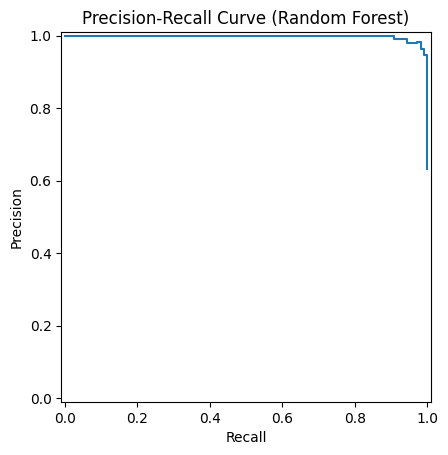

In [42]:
# Q23: Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()


In [43]:
# Q24: Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_model.fit(X_train, y_train)
print("Stacking Classifier (RF + LR) Accuracy:", stack_model.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier (RF + LR) Accuracy: 0.9707602339181286


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Q25: Train a Bagging Regressor with different levels of bootstrap samples and compare performance

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # Import BaggingRegressor
from sklearn.metrics import mean_squared_error # Import mean_squared_error
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.datasets import load_breast_cancer # Import load_breast_cancer

# Assuming X_train, y_train, X_test, y_test from previous cells are still available.
# If not, uncomment and run the following lines:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


for bootstrap in [True, False]:
    # Changed base_estimator to estimator to match current sklearn API
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10,
                           bootstrap=bootstrap, random_state=42)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"Bootstrap={bootstrap} -> MSE: {mse}")

Bootstrap=True -> MSE: 0.03923976608187135
Bootstrap=False -> MSE: 0.06245614035087719
